In [100]:
import numpy as np
import matplotlib.pyplot as plt

In [101]:
# Hypothesis: sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss fn: -ve log likelihood
def compute_loss(y, hx):
    return np.mean(y * np.log(hx) + (1 - y) * np.log(1 - hx))

# Gradient of loss
def compute_gradient(X, y, hx):
    return np.dot(X.T, (hx - y)) / y.shape[0]

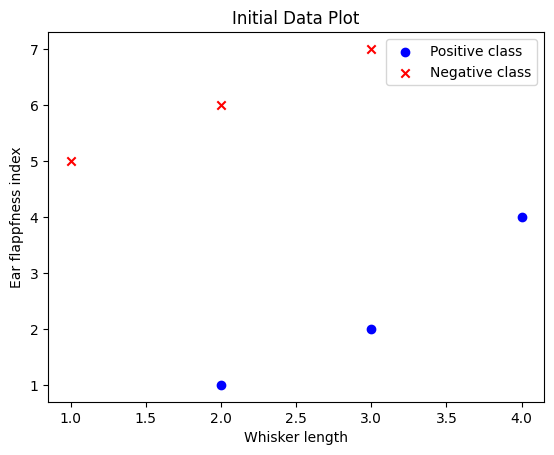

In [102]:
# Dataset
X = np.array([
[2, 1],
[3, 2],
[4, 4], # Positive examples
[1, 5],
[2, 6],
[3, 7] # Negative examples
])
y = np.array([1, 1, 1, 0, 0, 0])# Labels


# Plot initial data
plt.scatter(X[:3, 0], X[:3, 1], color='blue', marker='o', label='Positive class')
plt.scatter(X[3:, 0], X[3:, 1], color='red', marker='x', label='Negative class')
plt.xlabel('Whisker length')
plt.ylabel('Ear flappfness index')
plt.legend ()
plt.title('Initial Data Plot')
plt.show()

In [108]:
# Logistic regression model

def logistic_regression(X, y, learning_rate=0.1, num_iterations=50):
    # Add intercept term to X
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Initialize weights
    weights = np.zeros (X.shape [1])

    # Gradient descent
    for i in range (num_iterations):
        z = np.dot(X, weights)
        hx = sigmoid(z)
        loss = compute_loss (y, hx)
        gradient = compute_gradient(X, y, hx)
        weights -= learning_rate * gradient
        
        if i%10 == 0:
            plot_decision_boundary(X, y, weights, loss, i)
            print(f'Iteration {i}: Theta={weights}, Loss={loss}')

    return weights

In [104]:
# Plotting function for decision boundary
def plot_decision_boundary(X, y, weights, loss, iteration):
    plt.scatter(X[:3, 1], X[:3, 2], color='blue', marker='o', label='Positive class' if iteration == 0 else '')
    plt.scatter(X[3:, 1], X[3:, 2], color='red', marker='x', label='Negative class' if iteration == 0 else '')

    # Extend the x values a bit beyond the minimum and maximum values of the dataset
    x_values = np.array ([np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1])
    y_values = -(weights [0] + weights [1] * x_values) / weights [2]
    plt.plot(x_values, y_values, "k")

    plt.xlim(x_values[0], x_values [1])
    plt.ylim(np.min(X[:, 2]) -1, np.max (X[:, 2]) + 1)
    plt.xlabel( 'Whisker length')
    plt.ylabel('Ear flappiness index')
    plt.title(f"Decision boundary at iteration {iteration}\nLoss: {loss}")
    if iteration == 0:
        plt.legend()
    plt.show()

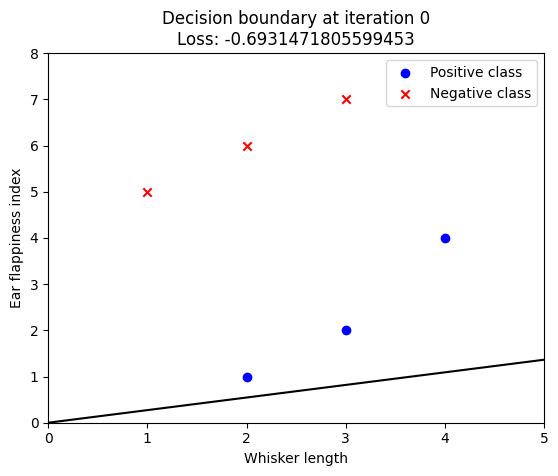

Iteration 0: Theta=[ 0.          0.025      -0.09166667], Loss=-0.6931471805599453


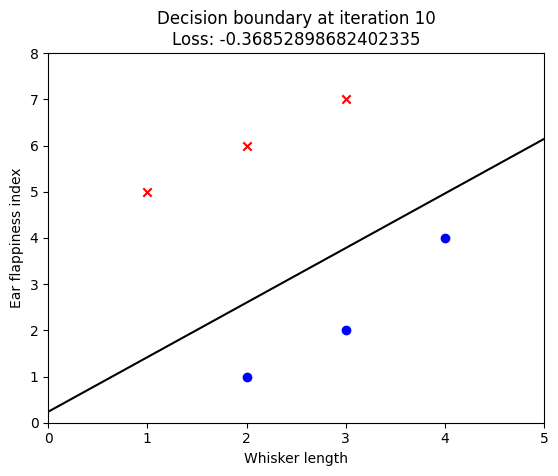

Iteration 10: Theta=[ 0.08979277  0.44735586 -0.37868509], Loss=-0.36852898682402335


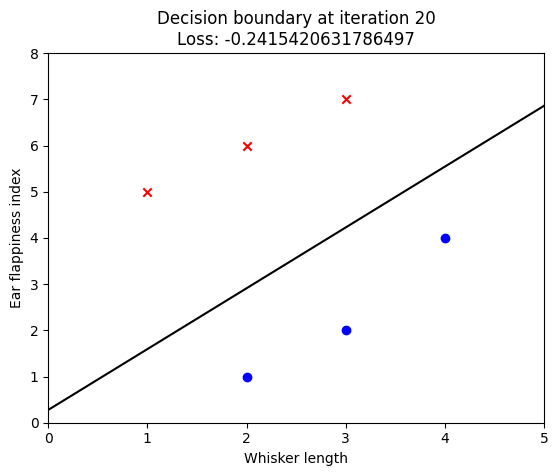

Iteration 20: Theta=[ 0.15409527  0.73473921 -0.55787677], Loss=-0.2415420631786497


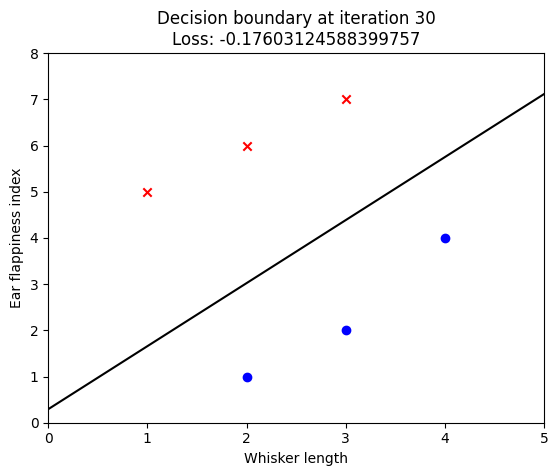

Iteration 30: Theta=[ 0.20129626  0.94131688 -0.68973077], Loss=-0.17603124588399757


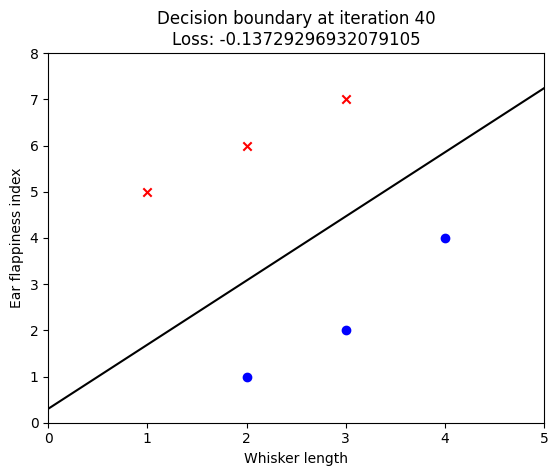

Iteration 40: Theta=[ 0.23824354  1.100363   -0.79256041], Loss=-0.13729296932079105


In [109]:
weights = logistic_regression(X, y)